In [1]:
import argparse, os, sys
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation,TriAnalyzer
import cartopy.crs as ccrs
from pyproj import Proj, transform


import numpy as np
import netCDF4 as nc
import pyfesom2 as pf


In [2]:
meshpath = '/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/'

aa=0
bb=0
cc=0
abg = [aa, bb, cc]
mesh = pf.load_mesh(meshpath, abg=abg, usepickle=False)

Load 2d part of the mesh in 0 second(s)


15.12065145154158 134.9914760823295 km
{'a': 6378137.0, 'proj': 'robin', 'lon_0': 0}


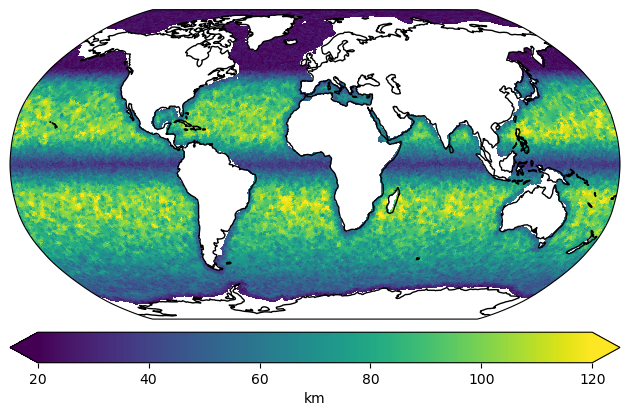

In [3]:

elem2=mesh.elem[mesh.no_cyclic_elem,:]
voltri = mesh.voltri[mesh.no_cyclic_elem]
reso = np.sqrt( np.sqrt(3.)*voltri)/1000.  # resolution unit: km
print(np.min(reso), np.max(reso), 'km')

gridinfo ="+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
pyproj_convert = Proj(gridinfo)
mx, my = pyproj_convert(mesh.x2, mesh.y2)

crs_source = ccrs.Robinson(central_longitude=0, globe=None)
print(crs_source.proj4_params)

fig = plt.figure()
ax = fig.add_subplot(1, 1,1,projection=crs_source)
ax.set_global()
ax.coastlines()
pp = plt.tripcolor(mx, my, elem2, facecolors=reso,edgecolors='none',cmap=plt.cm.viridis, vmin=20, vmax=120)
plt.colorbar(orientation='horizontal', pad=0.03,extend='both',label='km')
fig.tight_layout()

# plt.savefig('mesh_resolution.png')
# plt.show(block=False)
# plt.pause(3)
# plt.close()


maximum level changed to make cartopy happy


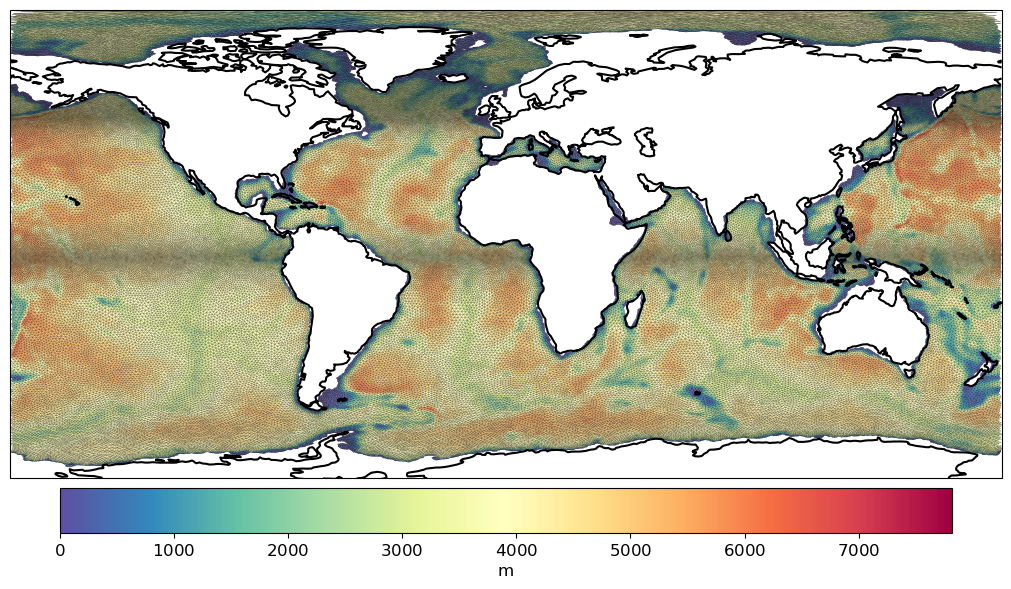

In [4]:
# topography
pf.tplot(mesh, mesh.topo.copy(), ptype='tri', lw=0.1, levels=(0,8000, 51), units='m')

# plt.savefig('mesh_topography.png')      
# plt.show(block=False)
# plt.pause(3)
# plt.close()

In [5]:
voltri

array([3.73728191e+08, 2.82962472e+08, 6.41619800e+08, ...,
       5.75066235e+08, 3.35685907e+08, 3.09784288e+08])